In [1]:
!git clone https://github.com/SeventhSERGIO/datasets.git

Cloning into 'datasets'...


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
codon_file_names = ['bact_codon.csv', 'invr_codon.csv', 'prim_codon.csv', 'virus_codon.csv']

codon_dfs = {}
for name in codon_file_names:
    codon_dfs[name[:4]] = pd.read_csv(f'/content/datasets/uso_de_codones/{name}', sep = '\t', header=None)
    codon_dfs[name[:4]]['y'] = pd.Series([name[:4]] * codon_dfs[name[:4]].shape[0])

all_codons = pd.concat(codon_dfs.values())

# Escoger el número de dimensiones

In [ ]:
all_codons[all_codons.columns[:-1]]

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.000903,0.039711,0.016245,0.015343,0.000000,0.002708,0.000000,0.039711,0.037906,0.006318,...,0.020758,0.002708,0.000903,0.026173,0.006318,0.017148,0.009928,0.000000,0.000903,0.002708
1,0.000000,0.018349,0.000000,0.009174,0.064220,0.009174,0.018349,0.000000,0.000000,0.027523,...,0.009174,0.055046,0.027523,0.000000,0.027523,0.009174,0.009174,0.009174,0.000000,0.000000
2,0.002589,0.039148,0.031852,0.005480,0.000776,0.003668,0.000358,0.036549,0.060896,0.001604,...,0.025892,0.000445,0.000660,0.027529,0.000633,0.015795,0.015154,0.000140,0.000535,0.002378
3,0.001891,0.000630,0.000315,0.002206,0.025528,0.008824,0.010085,0.003152,0.001576,0.025528,...,0.010085,0.039395,0.025528,0.010715,0.050425,0.021116,0.014812,0.003467,0.000000,0.000315
4,0.001413,0.001413,0.000000,0.007063,0.012996,0.000989,0.004662,0.001695,0.000283,0.012007,...,0.006781,0.038000,0.017375,0.011301,0.055516,0.015398,0.005933,0.003673,0.000141,0.000141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4092,0.008333,0.032353,0.011274,0.025980,0.001961,0.001961,0.004902,0.029412,0.014216,0.008333,...,0.019608,0.009804,0.005392,0.018628,0.018628,0.021569,0.012745,0.000000,0.001471,0.000000
4093,0.003241,0.009400,0.003890,0.006807,0.011021,0.015883,0.009724,0.013938,0.008104,0.020746,...,0.013614,0.023339,0.021070,0.013614,0.016532,0.023663,0.015559,0.001297,0.000000,0.000000
4094,0.002315,0.000000,0.004630,0.004630,0.023148,0.030093,0.006944,0.004630,0.002315,0.018519,...,0.018519,0.025463,0.025463,0.011574,0.027778,0.016204,0.009259,0.002315,0.002315,0.000000
4095,0.009926,0.029777,0.014888,0.017370,0.007444,0.019851,0.009926,0.014888,0.007444,0.017370,...,0.004963,0.017370,0.004963,0.004963,0.007444,0.017370,0.019851,0.000000,0.002481,0.000000


In [ ]:
# Paso 1: Estandarización de los datos (var = 1, desv = 0)
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
X_std = sc.fit_transform(all_codons[all_codons.columns[:-1]])

In [ ]:
# Paso 2: Obtener matriz de covarianza
cov_mat = np.cov(X_std.T)

In [ ]:
# Paso 3: Descomponer la matriz de covarianza en eigenvectores y eigenvalores
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
# print('Eigenvals : ', eigen_vals)
# print('Eigenvects : ', eigen_vecs)

In [ ]:
# Paso 4: Ordenar eigenvalores de manera decreciente
tot = sum(eigen_vals) # Suma de eigenvals
var_exp = [ev/tot for ev in sorted(eigen_vals, reverse = True)]

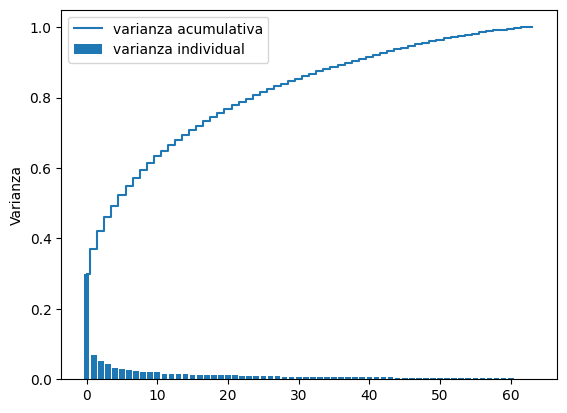

In [ ]:
# Paso 5: Seleccionar los k eigenvectores con los k mayores eigenvalores; con k la dimensión de un nuevo subespacio

# Gráfica
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(len(var_exp)), var_exp, label = 'varianza individual', align = 'center')
plt.step(range(len(cum_var_exp)), cum_var_exp, where = 'mid', label = 'varianza acumulativa')
plt.legend(loc = 'best')
plt.ylabel('Varianza')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Aplica PCA para reducir la dimensionalidad a 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_reshape)

# Selecciona aleatoriamente 6000 índices de X_pca
random_indx = np.random.choice(len(X_pca), 6000, replace=False)
X_pca = X_pca[random_indx]
y_pca = labels[random_indx]

# Grafica los primeros 2 componentes principales con imágenes de caras diminutas
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)

# Define diferentes marcadores para cada clase
markers=['o','v','^','<','>','8','s','P','*','X']

# Grafica cada clase con un marcador diferente
for i, marker in enumerate(markers):
  ax.scatter(*X_pca[y_pca==str(i)].T, label=i, marker=marker, alpha=0.7, s=20)

# Añade leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left', fontsize=15)

# Ajusta los límites del gráfico para ser un poco más amplios que el mínimo y máximo de las características transformadas
plt.xlim(min(X_pca[:,0]) - 0.5, max(X_pca[:,0]) + 0.5)
plt.ylim(min(X_pca[:,1]) - 0.5, max(X_pca[:,1]) + 0.5)

# Elimina las etiquetas de los ejes
plt.xticks([])
plt.yticks([])
plt.title('Espacio reducido por PCA')
plt.show()